# Integrated Predictive Analytics and Machine Learning for Enhanced Wildfire Risk Assessment in Alberta


## Data Loading

First, let's grab the information from the file named `wildfire_data.csv` and put it into a variable called `'data'` using `pandas`.


In [1]:
# import the necessary packages
import pandas as pd

# load the data
data = None

# Read CSV file using pandas
data = pd.read_csv('Data/wildfire_data.csv')

data.head(3)

fire_year fire_number fire_name  current_size size_class  \
0       2021      CWF001       NaN          0.01          A   
1       2021      CWF002       NaN          0.01          A   
2       2021      CWF003       NaN          0.05          A   

   fire_location_latitude  fire_location_longitude      fire_origin  \
0               49.410191              -114.318843  Provincial Park   
1               49.587753              -114.378655  Provincial Land   
2               51.119500              -114.778950  Provincial Land   

    general_cause_desc industry_identifier_desc  ...  \
0  Power Line Industry                      NaN  ...   
1           Recreation                      NaN  ...   
2             Resident                      NaN  ...   

  distance_from_water_source first_bucket_drop_date       bh_fs_date  \
0                        NaN                    NaN  1/13/2021 13:25   
1                        NaN                    NaN  1/29/2021 10:45   
2                        NaN                    NaN  2/23/2021 10:42   

  bh_hectares       uc_fs_date uc_hectares to_fs_date  to_hectares  \
0        0.01  1/13/2021 13:25        0.01        NaN          NaN   
1        0.01  1/29/2021 10:45        0.01        NaN          NaN   
2        0.05  2/23/2021 10:42        0.05        NaN          NaN   

        ex_fs_date ex_hectares  
0  1/13/2021 13:35        0.01  
1  1/29/2021 13:15        0.01  
2  2/23/2021 10:52        0.05  

[3 rows x 50 columns]

In [2]:
# List of columns to be removed
columns_to_remove = ['fire_number', 'fire_name', 'size_class', 'industry_identifier_desc', 'responsible_group_desc', 'det_agent', 'det_agent_type', 'discovered_size', 'dispatched_resource', 'dispatch_date', 'assessment_resource', 'assessment_datetime', 'ia_access', 'bucketing_on_fire', 'first_bucket_drop_date', 'distance_from_water_source', 'bh_fs_date', 'bh_hectares', 'uc_fs_date', 'uc_hectares', 'to_fs_date', 'to_hectares', 'ex_fs_date', 'ex_hectares']

# Removing the specified columns
data_cleaned = data.drop(columns=columns_to_remove)

# Dropping rows with missing values in the remaining columns of the dataset
data_cleaned = data_cleaned.dropna()


data_cleaned.drop_duplicates(inplace=True)
data_cleaned.reset_index(drop=True, inplace=True)

data_cleaned.head()


fire_year  current_size  fire_location_latitude  fire_location_longitude  \
0       2021          0.01               49.410191              -114.318843   
1       2021          0.01               50.403817              -114.496917   
2       2021         29.60               53.752683              -116.657933   
3       2021          8.05               53.600200              -116.201400   
4       2021        479.30               53.414000              -115.785417   

          fire_origin    general_cause_desc       activity_class  \
0     Provincial Park   Power Line Industry           Operations   
1  Indian Reservation              Resident      Refuse Disposal   
2     Provincial Land       Forest Industry      Debris Disposal   
3        Private Land  Agriculture Industry           Operations   
4     Provincial Land            Recreation  Cooking and Warming   

          true_cause  fire_start_date  discovered_date  ...  \
0        Line Impact  1/13/2021 10:30  1/13/2021 11:35  ...   
1        Unsafe Fire    7/4/2021 0:00    7/4/2021 1:30  ...   
2        Unsafe Fire  4/16/2021 13:30  4/16/2021 13:50  ...   
3  Burning Substance  4/17/2021 14:13  4/17/2021 14:18  ...   
4        Unsafe Fire  4/30/2021 11:00  4/30/2021 11:23  ...   

  weather_conditions_over_fire temperature  relative_humidity  wind_direction  \
0                       Cloudy         4.0               65.0               W   
1                  Rainshowers        13.0               70.0             CLM   
2                        Clear        23.0               18.0              SE   
3                        Clear        19.8               20.0               E   
4                        Clear        18.0               22.0               W   

  wind_speed fuel_type initial_action_by  ia_arrival_at_fire_date  \
0       30.0        C7         FPD Staff          1/13/2021 13:20   
1        0.0        M2         FPD Staff            7/4/2021 3:22   
2        3.0        M1               HAC          4/16/2021 14:12   
3        7.0       O1b               HAC          4/17/2021 14:35   
4       10.0        C3               HAC          4/30/2021 11:42   

   fire_fighting_start_date fire_fighting_start_size  
0           1/13/2021 13:25                     0.01  
1             7/4/2021 3:22                     0.01  
2           4/16/2021 14:27                     0.30  
3           4/17/2021 14:42                     4.00  
4           4/30/2021 12:03                    10.00  

[5 rows x 26 columns]

In [3]:
# pip install mlxtend

## 1:Finding the most common reasons of wildfire.

Visualizing the most common causes of fires in a dataset by plotting a bar chart

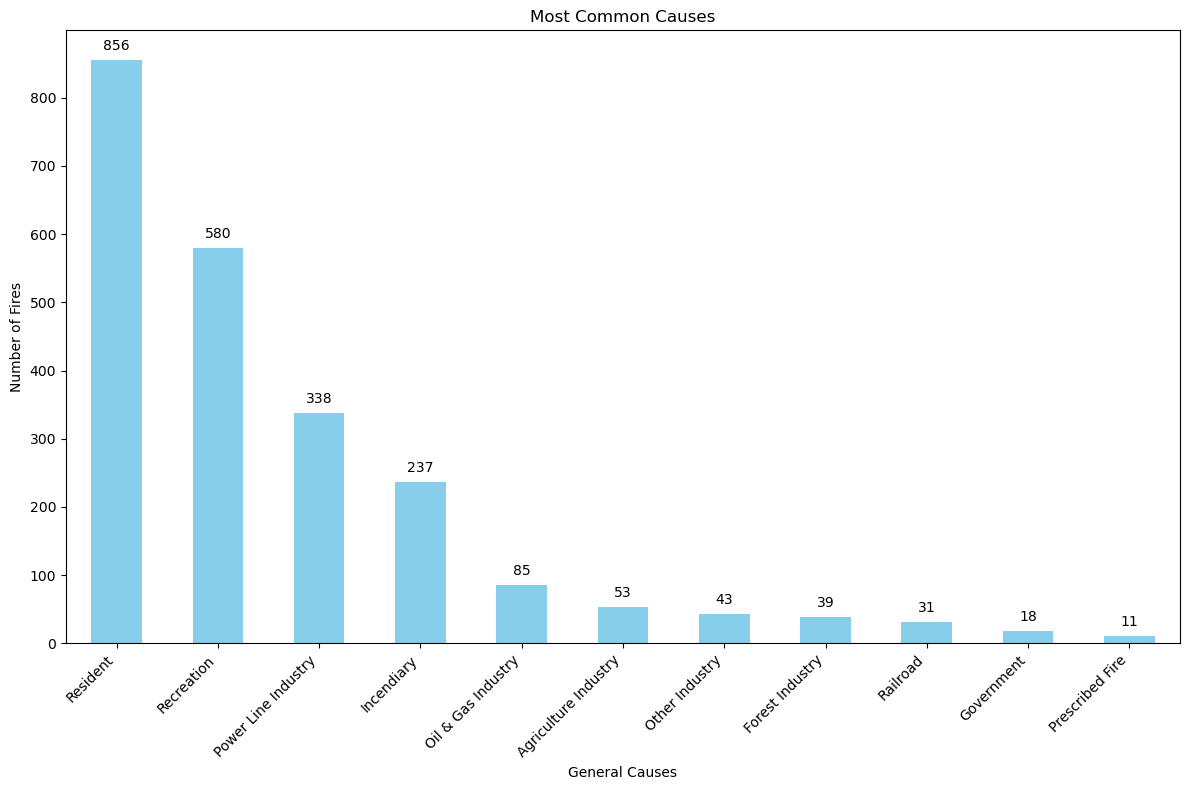

In [3]:
# Import the necessary package for plotting
import matplotlib.pyplot as plt
# Optionally, you can use seaborn for enhanced plot styling
# import seaborn as sns         

# Group the cleaned data by 'general_cause_desc' to aggregate similar causes and count occurrences
grouped_data = data_cleaned.groupby('general_cause_desc').size()

# Sort the aggregated data in descending order to highlight the most common causes of fires
general_causes = grouped_data.sort_values(ascending=False)

# Create a figure with a specified size to ensure the plot is large enough to be easily readable
plt.figure(figsize=(12, 8))
# Plot the sorted data as a bar chart with bars colored in sky blue
bars = general_causes.plot(kind='bar', color='skyblue')
# Set the title of the chart to 'Most Common Causes'
plt.title('Most Common Causes')
# Label the x-axis as 'General Causes' to indicate what the bars represent
plt.xlabel('General Causes')
# Label the y-axis as 'Number of Fires' to show the metric being measured
plt.ylabel('Number of Fires')
# Rotate the x-axis labels 45 degrees to the right for better legibility
plt.xticks(rotation=45, ha='right')

# Iterate through each bar to add an annotation displaying its height (the count of fires)
for bar in bars.patches:
    # Format the annotation text as an integer and position it above the bar
    plt.annotate(format(bar.get_height(), '.0f'),
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center', va='center', xytext=(0, 10),
                 textcoords='offset points')

# Adjust the layout to make sure everything fits without overlapping
plt.tight_layout()
# Display the plot
plt.show()


## Convert Data to Transaction Format
In this step, we will prepare the data for the Fire Size Analysis with its general cause. Then, we will use the Apriori algorithm to find the most frequent itemsets in the data.

In [4]:
import pandas as pd

# Group the cleaned fire data by 'general_cause_desc' and 'current_size', then count occurrences in each group
fire_size_reasons = data_cleaned.groupby(['general_cause_desc', 'current_size']).size()

# Reshape the data to have 'general_cause_desc' as columns, 'current_size' as rows, 
# and the count of occurrences as values, filling missing values with 0
fire_size_reasons = fire_size_reasons.unstack(level='general_cause_desc', fill_value=0)

# Convert all positive counts to 1 to indicate presence of the cause in that size category, 
# keeping 0 as is to indicate absence. This is preparation for binary representation needed for Apriori.
fire_size_reasons = fire_size_reasons.applymap(lambda x: 1 if x > 0 else 0)

# Sort the DataFrame in descending order based on all columns to prioritize the most common combinations of cause and size
fire_size_reasons = fire_size_reasons.sort_values(by=list(fire_size_reasons.columns), ascending=[False]*len(fire_size_reasons.columns))


# This statement attempts to sort 'fire_size_reasons' by 'current_size' in descending order, 
fire_size_reasons = fire_size_reasons.sort_values(by='current_size', ascending=False)

# Display the first few rows of the prepared DataFrame to verify the format and sorting
fire_size_reasons.head()


general_cause_desc  Agriculture Industry  Forest Industry  Government  \
current_size                                                            
87659.4                                0                0           0   
31997.0                                0                0           0   
17472.9                                0                1           0   
14554.3                                0                0           0   
5453.4                                 0                0           0   

general_cause_desc  Incendiary  Oil & Gas Industry  Other Industry  \
current_size                                                         
87659.4                      0                   0               0   
31997.0                      0                   1               0   
17472.9                      0                   0               0   
14554.3                      0                   0               1   
5453.4                       0                   0               0   

general_cause_desc  Power Line Industry  Prescribed Fire  Railroad  \
current_size                                                         
87659.4                               1                0         0   
31997.0                               0                0         0   
17472.9                               0                0         0   
14554.3                               0                0         0   
5453.4                                1                0         0   

general_cause_desc  Recreation  Resident  
current_size                              
87659.4                      0         0  
31997.0                      0         0  
17472.9                      0         0  
14554.3                      0         0  
5453.4                       0         0

## Apply Apriori Algorithm

Applying Apriori Algorithm from mlxtend.frequent_patterns to find frequent itemsets.

In [5]:
from mlxtend.frequent_patterns import apriori

# The DataFrame 'fire_size_reasons' is converted to a boolean type.
# This is necessary for the Apriori algorithm, as it works with binary data,
# indicating the presence (True) or absence (False) of an item in each transaction.
fire_size_reasons = fire_size_reasons.astype(bool)

# Apply the Apriori algorithm to the boolean DataFrame.
# The 'min_support' parameter is set to 0.02, meaning only itemsets appearing in at least 2% of transactions
# will be considered. 'use_colnames=True'
frequent_itemsets = apriori(fire_size_reasons, min_support=0.02, use_colnames=True, low_memory=True)

# Display the found frequent itemsets, sorted by their support in descending order.
# The 'support' value indicates how frequently each itemset appears in the dataset,
# with higher values signifying more common itemsets.
frequent_itemsets.sort_values(by='support', ascending=False)


support                                           itemsets
10   0.482659                                         (Resident)
9    0.355491                                       (Recreation)
6    0.274566                              (Power Line Industry)
3    0.164740                                       (Incendiary)
51   0.156069                             (Recreation, Resident)
..        ...                                                ...
157  0.020231  (Oil & Gas Industry, Other Industry, Power Lin...
231  0.020231  (Other Industry, Resident, Railroad, Power Lin...
230  0.020231  (Recreation, Other Industry, Railroad, Power L...
158  0.020231  (Oil & Gas Industry, Recreation, Other Industr...
154  0.020231  (Recreation, Incendiary, Railroad, Agriculture...

[308 rows x 2 columns]

## Exploring DataFrame with 3 different support thresholds

In [6]:
frequent_itemsets_1 = None
frequent_itemsets_2 = None
frequent_itemsets_3 = None

# Setting minimum support to 0.1 and find frequent itemsets with a initialized minimum support using Apriori algorithm
min_support_1 = 0.1
frequent_itemsets_1 = apriori(fire_size_reasons, min_support=min_support_1, use_colnames=True)

# Setting minimum support to 0.15 and find frequent itemsets with a initialized minimum support using Apriori algorithm
min_support_2 = 0.15
frequent_itemsets_2 = apriori(fire_size_reasons, min_support=min_support_2, use_colnames=True)

# Setting minimum support to 0.25 and find frequent itemsets with a initialized minimum support using Apriori algorithm
min_support_3 = 0.25
frequent_itemsets_3 = apriori(fire_size_reasons, min_support=min_support_3, use_colnames=True)

In [7]:
######### This is a test-cell that print the frequent itemsets 1 #########

frequent_itemsets_1

support                           itemsets
0  0.164740                       (Incendiary)
1  0.118497               (Oil & Gas Industry)
2  0.274566              (Power Line Industry)
3  0.355491                       (Recreation)
4  0.482659                         (Resident)
5  0.104046  (Recreation, Power Line Industry)
6  0.121387    (Resident, Power Line Industry)
7  0.156069             (Recreation, Resident)

In [8]:
######### This is a test-cell that print the frequent itemsets 2 #########

frequent_itemsets_2

support                itemsets
0  0.164740            (Incendiary)
1  0.274566   (Power Line Industry)
2  0.355491            (Recreation)
3  0.482659              (Resident)
4  0.156069  (Recreation, Resident)

In [9]:
######### This is a test-cell that print the frequent itemsets 3 #########

frequent_itemsets_3

support               itemsets
0  0.274566  (Power Line Industry)
1  0.355491           (Recreation)
2  0.482659             (Resident)

#### Explanation:

  We can see that the most frequent reasons are  Power Line Industry , Recreation and Residents  when threshold is set to 0.1, 0.15 and 0.25. The support value for the Power Line Industry is 0.274566 , Recreation is 0.355491 and Residents 0.482659   which means these are 27.54%(Power Line Industry) , 35.54%(Recreation) and 48.26%(Residents) that are the causes of all Wildfires. 

## Generate Association Rules.

After identifying frequent itemsets, genertaing association rules using the association_rules function

In [10]:
from mlxtend.frequent_patterns import association_rules

rules  = None

# Generate the rules with support metric and minimimum threshold 0.08
rules = association_rules(frequent_itemsets, metric="support", min_threshold=0.08)

# Display the dataframe
rules

antecedents                        consequents  \
0                        (Recreation)                       (Incendiary)   
1                        (Incendiary)                       (Recreation)   
2                          (Resident)                       (Incendiary)   
3                        (Incendiary)                         (Resident)   
4                        (Recreation)              (Power Line Industry)   
5               (Power Line Industry)                       (Recreation)   
6                          (Resident)              (Power Line Industry)   
7               (Power Line Industry)                         (Resident)   
8                        (Recreation)                         (Resident)   
9                          (Resident)                       (Recreation)   
10             (Recreation, Resident)                       (Incendiary)   
11           (Recreation, Incendiary)                         (Resident)   
12             (Resident, Incendiary)                       (Recreation)   
13                       (Recreation)             (Resident, Incendiary)   
14                         (Resident)           (Recreation, Incendiary)   
15                       (Incendiary)             (Recreation, Resident)   
16             (Recreation, Resident)              (Power Line Industry)   
17  (Recreation, Power Line Industry)                         (Resident)   
18    (Resident, Power Line Industry)                       (Recreation)   
19                       (Recreation)    (Resident, Power Line Industry)   
20                         (Resident)  (Recreation, Power Line Industry)   
21              (Power Line Industry)             (Recreation, Resident)   

    antecedent support  consequent support   support  confidence      lift  \
0             0.355491            0.164740  0.095376    0.268293  1.628584   
1             0.164740            0.355491  0.095376    0.578947  1.628584   
2             0.482659            0.164740  0.098266    0.203593  1.235844   
3             0.164740            0.482659  0.098266    0.596491  1.235844   
4             0.355491            0.274566  0.104046    0.292683  1.065982   
5             0.274566            0.355491  0.104046    0.378947  1.065982   
6             0.482659            0.274566  0.121387    0.251497  0.915979   
7             0.274566            0.482659  0.121387    0.442105  0.915979   
8             0.355491            0.482659  0.156069    0.439024  0.909595   
9             0.482659            0.355491  0.156069    0.323353  0.909595   
10            0.156069            0.164740  0.080925    0.518519  3.147498   
11            0.095376            0.482659  0.080925    0.848485  1.757939   
12            0.098266            0.355491  0.080925    0.823529  2.316595   
13            0.355491            0.098266  0.080925    0.227642  2.316595   
14            0.482659            0.095376  0.080925    0.167665  1.757939   
15            0.164740            0.156069  0.080925    0.491228  3.147498   
16            0.156069            0.274566  0.083815    0.537037  1.955945   
17            0.104046            0.482659  0.083815    0.805556  1.668995   
18            0.121387            0.355491  0.083815    0.690476  1.942315   
19            0.355491            0.121387  0.083815    0.235772  1.942315   
20            0.482659            0.104046  0.083815    0.173653  1.668995   
21            0.274566            0.156069  0.083815    0.305263  1.955945   

    leverage  conviction  zhangs_metric  
0   0.036812    1.141522       0.598859  
1   0.036812    1.530708       0.462095  
2   0.018753    1.048785       0.368879  
3   0.018753    1.282106       0.228475  
4   0.006440    1.025613       0.096039  
5   0.006440    1.037768       0.085325  
6  -0.011135    0.969179      -0.150604  
7  -0.011135    0.927309      -0.112253  
8  -0.015512    0.922217      -0.133607  
9  -0.015512    0.952504      -0.161156  
10  0.055214    1.73

## Visualizing itemset support 
Heatmaps help us understand a large number of rules between a small number of antecedents and consequents

In [11]:
# Convert the frozensets into strings
rules['antecedents'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents'] = rules['consequents'].apply(lambda a: ','.join(list(a)))

# Display the first 5 rows of the dataframe
rules.head(5)

antecedents          consequents  antecedent support  consequent support  \
0  Recreation           Incendiary            0.355491            0.164740   
1  Incendiary           Recreation            0.164740            0.355491   
2    Resident           Incendiary            0.482659            0.164740   
3  Incendiary             Resident            0.164740            0.482659   
4  Recreation  Power Line Industry            0.355491            0.274566   

    support  confidence      lift  leverage  conviction  zhangs_metric  
0  0.095376    0.268293  1.628584  0.036812    1.141522       0.598859  
1  0.095376    0.578947  1.628584  0.036812    1.530708       0.462095  
2  0.098266    0.203593  1.235844  0.018753    1.048785       0.368879  
3  0.098266    0.596491  1.235844  0.018753    1.282106       0.228475  
4  0.104046    0.292683  1.065982  0.006440    1.025613       0.096039

In [12]:
# Create a pivot table for the rules
pivot_rules = rules.pivot_table(index='consequents', columns='antecedents', values='support')
# Display the rows of the dataframe
pivot_rules

antecedents                     Incendiary  Power Line Industry  Recreation  \
consequents                                                                   
Incendiary                             NaN                  NaN    0.095376   
Power Line Industry                    NaN                  NaN    0.104046   
Recreation                        0.095376             0.104046         NaN   
Recreation,Incendiary                  NaN                  NaN         NaN   
Recreation,Power Line Industry         NaN                  NaN         NaN   
Recreation,Resident               0.080925             0.083815         NaN   
Resident                          0.098266             0.121387    0.156069   
Resident,Incendiary                    NaN                  NaN    0.080925   
Resident,Power Line Industry           NaN                  NaN    0.083815   

antecedents                     Recreation,Incendiary  \
consequents                                             
Incendiary                                        NaN   
Power Line Industry                               NaN   
Recreation                                        NaN   
Recreation,Incendiary                             NaN   
Recreation,Power Line Industry                    NaN   
Recreation,Resident                               NaN   
Resident                                     0.080925   
Resident,Incendiary                               NaN   
Resident,Power Line Industry                      NaN   

antecedents                     Recreation,Power Line Industry  \
consequents                                                      
Incendiary                                                 NaN   
Power Line Industry                                        NaN   
Recreation                                                 NaN   
Recreation,Incendiary                                      NaN   
Recreation,Power Line Industry                             NaN   
Recreation,Resident                                        NaN   
Resident                                              0.083815   
Resident,Incendiary                                        NaN   
Resident,Power Line Industry                               NaN   

antecedents                     Recreation,Resident  Resident  \
consequents                                                     
Incendiary                                 0.080925  0.098266   
Power Line Industry                        0.083815  0.121387   
Recreation                                      NaN  0.156069   
Recreation,Incendiary                           NaN  0.080925   
Recreation,Power Line Industry                  NaN  0.083815   
Recreation,Resident                             NaN       NaN   
Resident                                        NaN       NaN   
Resident,Incendiary                             NaN       NaN   
Resident,Power Line Industry                    NaN       NaN   

antecedents                     Resident,Incendiary  \
consequents                                           
Incendiary                                      NaN   
Power Line Industry                             NaN   
Recreation                                 0.080925   
Recreation,Incendiary                           NaN   
Recreation,Power Line Industry                  NaN   
Recreation,Resident                             NaN   
Resident                                        NaN   
Resident,Incendiary                             NaN   
Resident,Power Line Industry                    NaN   

antecedents                     Resident,Power Line Industry  
consequents                                                   
Incendiary                                               NaN  
Power Line Industry                                      NaN  
Recreation                                          0.083815  
Recreation,Incendiary                                    NaN  
Recreation,Power Line Industry                           NaN  
Recreation,R

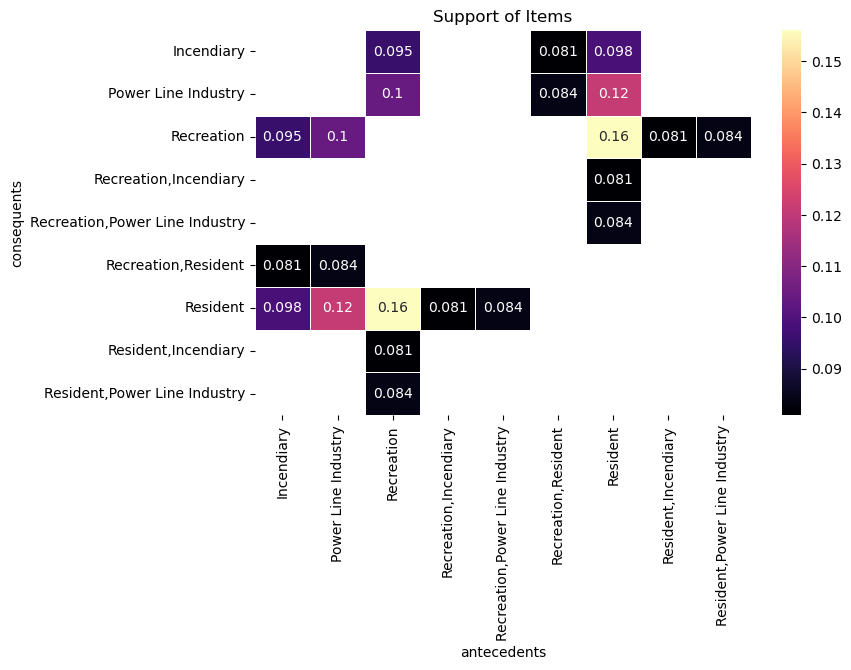

In [13]:
import seaborn as sns

# Plot the pivot table
plt.figure(figsize=(8, 5))
sns.heatmap(pivot_rules, annot=True, cmap="magma", linewidths=0.5)
plt.title("Support of Items")
plt.show()

## Exploring Geographic Patterns

### Loading Alberta Regions Data

In [25]:
#!pip install geopandas
import geopandas as gpd
import os

# Read the Alberta Regions csv file using GeoPandas
alberta_regions = gpd.read_file(os.path.join('Data', "alberta_regions.shp"))

# Rename LUF_NAME and LUF_CODE
alberta_regions.rename(columns={'LUF_NAME': 'REGION_NAME', 'LUF_CODE': 'REGION_CODE'}, inplace=True)

print(alberta_regions)
# Display rows
alberta_regions.head(3)

          REGION_NAME REGION_CODE      HECTARES  \
0         Upper Peace          03  7.427032e+06   
1  South Saskatchewan          07  8.377421e+06   
2  North Saskatchewan          05  8.578088e+06   
3     Lower Athabasca          02  9.321247e+06   
4     Upper Athabasca          04  8.300351e+06   
5         Lower Peace          01  1.921975e+07   
6            Red Deer          06  5.033751e+06   

                                            geometry  
0  POLYGON ((-123541.478 6193998.017, -123564.073...  
1  POLYGON ((15112.082 5726247.953, 15114.613 572...  
2  MULTIPOLYGON (((-158294.968 5782097.818, -1583...  
3  POLYGON ((278786.874 6652136.572, 278880.282 6...  
4  POLYGON ((-45116.253 6203008.598, -45124.690 6...  
5  MULTIPOLYGON (((142029.208 6145909.921, 142186...  
6  POLYGON ((342239.231 5776694.205, 342294.820 5...  


REGION_NAME REGION_CODE     HECTARES  \
0         Upper Peace          03  7427031.792   
1  South Saskatchewan          07  8377420.572   
2  North Saskatchewan          05  8578088.304   

                                            geometry  
0  POLYGON ((-123541.478 6193998.017, -123564.073...  
1  POLYGON ((15112.082 5726247.953, 15114.613 572...  
2  MULTIPOLYGON (((-158294.968 5782097.818, -1583...

### Setting the CRS of Alberta Regions Data

In [21]:
# Setting the CRS of alberta regions to EPSG 4326
alberta_regions = alberta_regions.to_crs("EPSG:4326")

### Show all the data on folium map

In [15]:
import folium
from folium.plugins import MarkerCluster

# Create a folium map
m = folium.Map(location=[55.0000, -115.0000], zoom_start=5)

# Adding a GeoJson layer to the Folium map object `m`
folium.GeoJson(
    alberta_regions,  # GeoJSON data for Alberta regions
    name='Regions',  # Name of the layer, useful for layer control
    style_function=lambda feature: {  # Style function to style each feature
        'fillColor': 'pink',  # Fill color of the regions
        'color': 'cyan',  # Border color of the regions
        'weight': 2,  # Width of the region borders
        'fillOpacity': 0.4  # Fill opacity for the regions
    }
).add_to(m)  # Adds the configured GeoJson layer to the map `m`

# Adds the MarkerCluster to the map `m`
fire_cluster = MarkerCluster().add_to(m)

# Extract the first 500 rows from the cleaned dataset 'data_cleaned'
fire_data = data_cleaned.head(500)

# Loop over each row in the fire_data DataFrame
for index, row in fire_data.iterrows():
    # Create a Folium Marker for each wildfire incident
    folium.Marker(
        location=[row['fire_location_latitude'], row['fire_location_longitude']],  # Set the marker at the fire's latitude and longitude
        popup=f'Fire Location: {row["current_size"]} hectares',  # Define a popup text showing the size of the fire
        icon=folium.Icon(color='red', icon='fire')  # Use a red icon with a 'fire' symbol to represent the fire location
    ).add_to(fire_cluster)  # Add the marker to the previously defined MarkerCluster 'fire_cluster'

# Display the map
m

### Creating a GeoDataFrame for Fire Data with Shapely and GeoPandas

In [19]:
# import the necessary packages
from shapely.geometry import Point

# create a geometry column
fires_geometry = None

# create a GeoDataFrame
fire_gdf_data = None

# Creates a list of Point geometries from longitude and latitude coordinates
fires_geometry = [Point(coords) for coords in zip(fire_data['fire_location_longitude'], fire_data['fire_location_latitude'])]

# Creates a GeoDataFrame from fire data and the generated geometry column
fire_gdf_data = gpd.GeoDataFrame(fire_data, geometry=fires_geometry, crs=4326)

# Display the Fire GeoDataframe Data
fire_gdf_data.head(3)

fire_year  current_size  fire_location_latitude  fire_location_longitude  \
0       2021          0.01               49.410191              -114.318843   
1       2021          0.01               50.403817              -114.496917   
2       2021         29.60               53.752683              -116.657933   

          fire_origin   general_cause_desc   activity_class   true_cause  \
0     Provincial Park  Power Line Industry       Operations  Line Impact   
1  Indian Reservation             Resident  Refuse Disposal  Unsafe Fire   
2     Provincial Land      Forest Industry  Debris Disposal  Unsafe Fire   

   fire_start_date  discovered_date  ... temperature relative_humidity  \
0  1/13/2021 10:30  1/13/2021 11:35  ...         4.0              65.0   
1    7/4/2021 0:00    7/4/2021 1:30  ...        13.0              70.0   
2  4/16/2021 13:30  4/16/2021 13:50  ...        23.0              18.0   

   wind_direction  wind_speed fuel_type initial_action_by  \
0               W        30.0        C7         FPD Staff   
1             CLM         0.0        M2         FPD Staff   
2              SE         3.0        M1               HAC   

  ia_arrival_at_fire_date  fire_fighting_start_date  fire_fighting_start_size  \
0         1/13/2021 13:20           1/13/2021 13:25                      0.01   
1           7/4/2021 3:22             7/4/2021 3:22                      0.01   
2         4/16/2021 14:12           4/16/2021 14:27                      0.30   

                      geometry  
0  POINT (-114.31884 49.41019)  
1  POINT (-114.49692 50.40382)  
2  POINT (-116.65793 53.75268)  

[3 rows x 27 columns]

### Displaying CRS of Fire GeoDataframe and Alberta Regions Dataframe 

In [22]:
print("CRS for Alberta Regions Data:", alberta_regions.crs)
print("CRS for Fire Data:", fire_gdf_data.crs)

CRS for Alberta Regions Data: EPSG:4326
CRS for Fire Data: EPSG:4326


In [24]:

gdf_region_data = None
# perfrom a spatial join
gdf_region_data = gpd.sjoin(fire_gdf_data , alberta_regions, how="inner", predicate='intersects')

gdf_region_data.head()

fire_year  current_size  fire_location_latitude  fire_location_longitude  \
0        2021          0.01               49.410191              -114.318843   
1        2021          0.01               50.403817              -114.496917   
56       2020          0.01               51.400665              -115.063332   
57       2020          0.05               48.998195              -113.578900   
58       2020          0.10               51.209050              -114.722700   

           fire_origin   general_cause_desc       activity_class  \
0      Provincial Park  Power Line Industry           Operations   
1   Indian Reservation             Resident      Refuse Disposal   
56     Provincial Land           Recreation  Cooking and Warming   
57     Provincial Land  Power Line Industry           Operations   
58     Provincial Land           Recreation         Unclassified   

            true_cause  fire_start_date  discovered_date  ... fuel_type  \
0          Line Impact  1/13/2021 10:30  1/13/2021 11:35  ...        C7   
1          Unsafe Fire    7/4/2021 0:00    7/4/2021 1:30  ...        M2   
56         Unsafe Fire   5/18/2020 6:00  5/18/2020 12:05  ...       O1a   
57  Mechanical Failure   7/5/2020 11:00   7/5/2020 15:17  ...        C2   
58   Incendiary Device   8/3/2020 17:38   8/8/2020 17:44  ...        C1   

   initial_action_by  ia_arrival_at_fire_date  fire_fighting_start_date  \
0          FPD Staff          1/13/2021 13:20           1/13/2021 13:25   
1          FPD Staff            7/4/2021 3:22             7/4/2021 3:22   
56         FPD Staff          5/18/2020 12:05           5/18/2020 12:05   
57         FPD Staff           7/5/2020 18:43            7/5/2020 19:20   
58         FPD Staff           8/8/2020 17:46            8/8/2020 17:48   

   fire_fighting_start_size                     geometry index_right  \
0                      0.01  POINT (-114.31884 49.41019)           1   
1                      0.01  POINT (-114.49692 50.40382)           1   
56                     0.01  POINT (-115.06333 51.40066)           1   
57                     0.02  POINT (-113.57890 48.99820)           1   
58                     0.01  POINT (-114.72270 51.20905)           1   

           REGION_NAME  REGION_CODE     HECTARES  
0   South Saskatchewan           07  8377420.572  
1   South Saskatchewan           07  8377420.572  
56  South Saskatchewan           07  8377420.572  
57  South Saskatchewan           07  8377420.572  
58  South Saskatchewan           07  8377420.572  

[5 rows x 31 columns]

In [42]:
# Import necessary libraries
import geopandas as gpd
from mlxtend.frequent_patterns import apriori, association_rules

# Define a list of regions to be selected for analysis
selected_region = ['North Saskatchewan', 'Upper Peace', 'South Saskatchewan']

# Initialize a dictionary to store DataFrames for each selected region
region_frames = {}
for region in selected_region:
    # Filter the gdf_region_data to only include rows where 'REGION_NAME' matches the current region in the loop
    region_frames[region] = gdf_region_data[gdf_region_data['REGION_NAME'] == region]

# Loop through each region DataFrame to perform analysis
for region, region_df in region_frames.items():
    # Group the data by 'current_size' and 'general_cause_desc' columns, count occurrences of each combination, 
    # and pivot the table so that 'general_cause_desc' becomes the columns. Replace missing values with 0.
    region_df = region_df.groupby(['current_size', 'general_cause_desc']).size().unstack(fill_value=0)
    
    # For each group, replace values greater than 1 with 1 to binarize the data, 
    # indicating the presence or absence of a cause for a given fire size.
    region_df[region_df > 1] = 1
    
    # Apply the Apriori algorithm to extract frequent itemsets with a minimum support of 0.05.
    # This identifies combinations of fire sizes and causes that occur together frequently.
    frequent_region_itemset = apriori(region_df, min_support=0.05, use_colnames=True)
    
    # Print the frequent itemsets for the current region
    print(f"Frequent itemsets for {region}:")
    display(frequent_region_itemset)
    
    # Check if any frequent itemsets were found for the current region.
    # If not, skip the generation of association rules for this region.
    if frequent_region_itemset.empty:
        print(f"No frequent itemsets found for {region}. Skipping association rule generation.")
        continue
    
    # Generate association rules based on the identified frequent itemsets.
    # Here, 'support' is used as the metric with a minimum threshold of 0.1.
    # This finds all the rules that indicate how frequently itemsets occur together.
    region_rules = association_rules(frequent_region_itemset, metric='support', min_threshold=0.1)
    
    # Display the association rules for the current region.
    print(f"Association rules for {region}:")
    display(region_rules)


Frequent itemsets for North Saskatchewan:


C:\Users\MIAN\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


support                                     itemsets
0     0.50                        (Power Line Industry)
1     0.35                                 (Recreation)
2     0.40                                   (Resident)
3     0.15            (Recreation, Power Line Industry)
4     0.10              (Resident, Power Line Industry)
5     0.10                       (Recreation, Resident)
6     0.10  (Recreation, Resident, Power Line Industry)

Association rules for North Saskatchewan:


antecedents                        consequents  \
0                        (Recreation)              (Power Line Industry)   
1               (Power Line Industry)                       (Recreation)   
2                          (Resident)              (Power Line Industry)   
3               (Power Line Industry)                         (Resident)   
4                        (Recreation)                         (Resident)   
5                          (Resident)                       (Recreation)   
6              (Recreation, Resident)              (Power Line Industry)   
7   (Recreation, Power Line Industry)                         (Resident)   
8     (Resident, Power Line Industry)                       (Recreation)   
9                        (Recreation)    (Resident, Power Line Industry)   
10                         (Resident)  (Recreation, Power Line Industry)   
11              (Power Line Industry)             (Recreation, Resident)   

    antecedent support  consequent support  support  confidence      lift  \
0                 0.35                0.50     0.15    0.428571  0.857143   
1                 0.50                0.35     0.15    0.300000  0.857143   
2                 0.40                0.50     0.10    0.250000  0.500000   
3                 0.50                0.40     0.10    0.200000  0.500000   
4                 0.35                0.40     0.10    0.285714  0.714286   
5                 0.40                0.35     0.10    0.250000  0.714286   
6                 0.10                0.50     0.10    1.000000  2.000000   
7                 0.15                0.40     0.10    0.666667  1.666667   
8                 0.10                0.35     0.10    1.000000  2.857143   
9                 0.35                0.10     0.10    0.285714  2.857143   
10                0.40                0.15     0.10    0.250000  1.666667   
11                0.50                0.10     0.10    0.200000  2.000000   

    leverage  conviction  zhangs_metric  
0     -0.025    0.875000      -0.204082  
1     -0.025    0.928571      -0.250000  
2     -0.100    0.666667      -0.625000  
3     -0.100    0.750000      -0.666667  
4     -0.040    0.840000      -0.380952  
5     -0.040    0.866667      -0.400000  
6      0.050         inf       0.555556  
7      0.040    1.800000       0.470588  
8      0.065         inf       0.722222  
9      0.065    1.260000       1.000000  
10     0.040    1.133333       0.666667  
11     0.050    1.125000       1.000000

Frequent itemsets for Upper Peace :


Empty DataFrame
Columns: [support, itemsets]
Index: []

No frequent itemsets found for Upper Peace . Skipping association rule generation.
Frequent itemsets for South Saskatchewan:


C:\Users\MIAN\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


support                                     itemsets
0  0.071429                            (Forest Industry)
1  0.142857                        (Power Line Industry)
2  0.785714                                 (Recreation)
3  0.285714                                   (Resident)
4  0.071429                (Forest Industry, Recreation)
5  0.071429            (Recreation, Power Line Industry)
6  0.071429              (Resident, Power Line Industry)
7  0.142857                       (Recreation, Resident)
8  0.071429  (Recreation, Resident, Power Line Industry)

Association rules for South Saskatchewan:


antecedents   consequents  antecedent support  consequent support  \
0  (Recreation)    (Resident)            0.785714            0.285714   
1    (Resident)  (Recreation)            0.285714            0.785714   

    support  confidence      lift  leverage  conviction  zhangs_metric  
0  0.142857    0.181818  0.636364 -0.081633    0.873016      -0.727273  
1  0.142857    0.500000  0.636364 -0.081633    0.428571      -0.444444